<a href="https://colab.research.google.com/github/glefko/tensorflow/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: 4η Εργασία στα Νευρωνικά Δίκτυα
## Author: Λευκόπουλος Γεώργιος (4588)

# Import Libraries

In [111]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [112]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [113]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 28, 28), Targets:(60000,)
Test Size - Inputs:(10000, 28, 28), Targets:(10000,)


# Displaying Random Digits

In [114]:
rows = 5
digits_per_row = 5

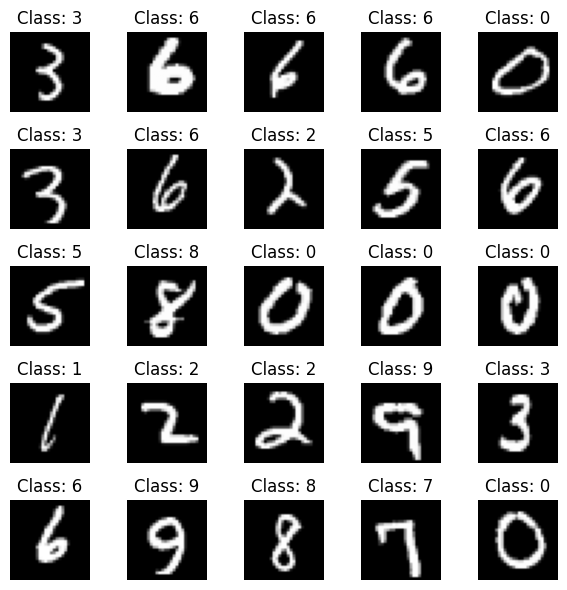

In [115]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 60000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [116]:
x_train = x_train.reshape((60000, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 784), Targets:(60000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [87]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5923 - loss: 1.3119 - val_accuracy: 0.8637 - val_loss: 0.5184
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8638 - loss: 0.4980 - val_accuracy: 0.8949 - val_loss: 0.3881
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8907 - loss: 0.3896 - val_accuracy: 0.9065 - val_loss: 0.3392
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9056 - loss: 0.3373 - val_accuracy: 0.9138 - val_loss: 0.3080
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9144 - loss: 0.3060 - val_accuracy: 0.9209 - val_loss: 0.2863
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9211 - loss: 0.2818 - val_accuracy: 0.9261 - val_loss: 0.2691
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9246 - loss: 0.2642 - val_accuracy: 0.9263 - val_loss: 0.2553
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9302 - loss: 0

# Display Loss and Accuracy per Training Epoch

In [74]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

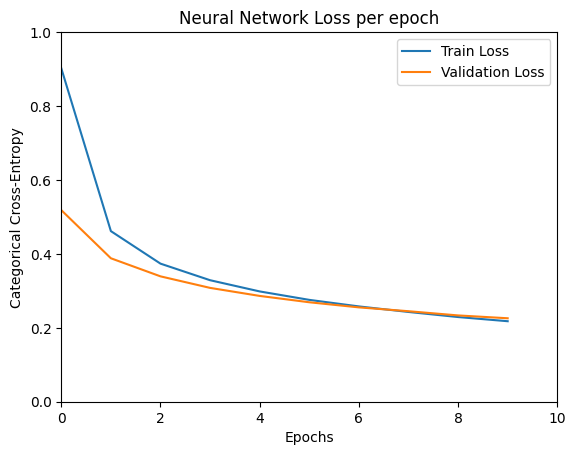

In [75]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

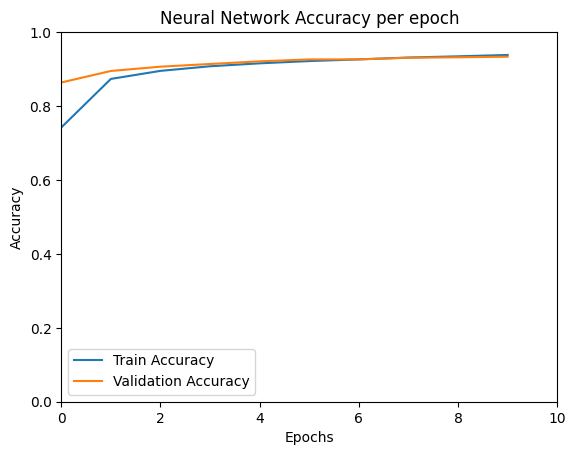

In [76]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


### Adding an extra layer

In [85]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-3'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)
print()
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-3 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5799 - loss: 1.3875 - val_accuracy: 0.8588 - val_loss: 0.5390
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8627 - loss: 0.5113 - val_accuracy: 0.8924 - val_loss: 0.3937
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8935 - loss: 0.3878 - val_accuracy: 0.9057 - val_loss: 0.3336
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9064 - loss: 0.3282 - val_accuracy: 0.9154 - val_loss: 0.2988
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9147 - loss: 0.2981 - val_accuracy: 0.9179 - val_loss: 0.2777
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9219 - loss: 0.2723 - val_accuracy: 0.9234 - val_loss: 0.2581
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9273 - loss: 0.2542 - val_accuracy: 0.9286 - val_loss: 0.2456
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9310 - loss: 

### Adding more neurons (1024 - 512)

In [88]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=1024, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=512, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)
print()
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,333,770 (5.09 MB)

 Trainable params: 1,333,770 (5.09 MB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.7014 - loss: 0.9933 - val_accuracy: 0.8986 - val_loss: 0.3659
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - accuracy: 0.9025 - loss: 0.3486 - val_accuracy: 0.9187 - val_loss: 0.2926
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.9233 - loss: 0.2769 - val_accuracy: 0.9278 - val_loss: 0.2551
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9340 - loss: 0.2371 - val_accuracy: 0.9329 - val_loss: 0.2331
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.9410 - loss: 0.2104 - val_accuracy: 0.9365 - val_loss: 0.2149
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.9486 - loss: 0.1869 - val_accuracy: 0.9412 - val_loss: 0.1993
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9530 - loss: 0.1707 - val_accuracy: 0.9438 - val_loss: 0.1921
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9570 

### Using less epochs

In [89]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 5

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=1024, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=512, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)
print()
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,333,770 (5.09 MB)

 Trainable params: 1,333,770 (5.09 MB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.7059 - loss: 0.9766 - val_accuracy: 0.8982 - val_loss: 0.3641
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9043 - loss: 0.3444 - val_accuracy: 0.9190 - val_loss: 0.2884
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.9230 - loss: 0.2751 - val_accuracy: 0.9268 - val_loss: 0.2525
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9344 - loss: 0.2358 - val_accuracy: 0.9318 - val_loss: 0.2304
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9415 - loss: 0.2090 - val_accuracy: 0.9378 - val_loss: 0.2148


### Decreasing the learning rate (0.0005)

In [91]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.0005
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)
print()
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4719 - loss: 1.6148 - val_accuracy: 0.8078 - val_loss: 0.7197
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8261 - loss: 0.6607 - val_accuracy: 0.8583 - val_loss: 0.5174
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8647 - loss: 0.5007 - val_accuracy: 0.8802 - val_loss: 0.4332
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8860 - loss: 0.4258 - val_accuracy: 0.8900 - val_loss: 0.3883
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8962 - loss: 0.3807 - val_accuracy: 0.8968 - val_loss: 0.3607
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9026 - loss: 0.3504 - val_accuracy: 0.9036 - val_loss: 0.3337
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9102 - loss: 0.3245 - val_accuracy: 0.9059 - val_loss: 0.3184
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9141 - loss: 

### Increasing the learning rate (0.01)


In [92]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)
print()
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7665 - loss: 0.7982 - val_accuracy: 0.8883 - val_loss: 0.4056
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8792 - loss: 0.4250 - val_accuracy: 0.8881 - val_loss: 0.3875
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8848 - loss: 0.3963 - val_accuracy: 0.8775 - val_loss: 0.4191
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8800 - loss: 0.4018 - val_accuracy: 0.8889 - val_loss: 0.3699
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8813 - loss: 0.3940 - val_accuracy: 0.8955 - val_loss: 0.3448
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8866 - loss: 0.3737 - val_accuracy: 0.8938 - val_loss: 0.3402
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8933 - loss: 0.3464 - val_accuracy: 0.9044 - val_loss: 0.3187
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8959 - loss: 

### Using ReLu for activation

In [93]:
activation = 'relu'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)
print()
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8261 - loss: 4.5814 - val_accuracy: 0.9244 - val_loss: 0.3175
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9380 - loss: 0.2588 - val_accuracy: 0.9402 - val_loss: 0.2534
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9582 - loss: 0.1579 - val_accuracy: 0.9461 - val_loss: 0.2303
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9696 - loss: 0.1108 - val_accuracy: 0.9511 - val_loss: 0.2206
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9764 - loss: 0.0842 - val_accuracy: 0.9527 - val_loss: 0.2129
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9820 - loss: 0.0663 - val_accuracy: 0.9553 - val_loss: 0.2069
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9854 - loss: 0.0539 - val_accuracy: 0.9572 - val_loss: 0.2075
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9887 - loss: 

## 2. Validation: Show 1 misclassified digit from each class.

## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

### Adding Dropout layers

In [118]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)
print()
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4342 - loss: 1.7130 - val_accuracy: 0.8451 - val_loss: 0.5477
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7797 - loss: 0.7128 - val_accuracy: 0.8871 - val_loss: 0.3973
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8310 - loss: 0.5527 - val_accuracy: 0.8987 - val_loss: 0.3453
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8518 - loss: 0.4838 - val_accuracy: 0.9049 - val_loss: 0.3206
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8657 - loss: 0.4394 - val_accuracy: 0.9128 - val_loss: 0.2996
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8770 - loss: 0.4108 - val_accuracy: 0.9187 - val_loss: 0.2819
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8821 - loss: 0.3915 - val_accuracy: 0.9223 - val_loss: 0.2694
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8886 - loss: 

## 4. Upload the exercise in your GitHub repository. Google Colab can instantly deploy this notebook into a Github repository.

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [ ]:
!pip show tensorflow